In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import numpy as np
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override()

df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = '2023-03-15')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706890,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839730,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819364,394024400
...,...,...,...,...,...,...
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400


In [ ]:
df.shape

(2817, 6)

(2817, 6)

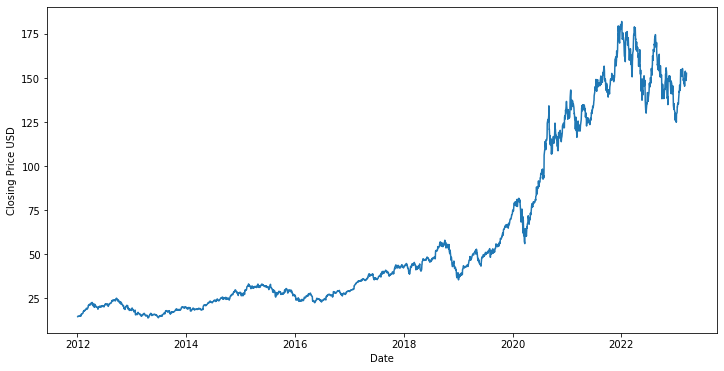

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price USD')
plt.show()

In [ ]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2254

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80060992],
       [0.81233176],
       [0.82494608]])

In [ ]:
train_data = scaled_data[:training_data_len, :]
train_data.shape

(2254, 1)

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2194, 60, 1)

In [ ]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 64, epochs = 50)

Epoch 1/50
35/35 [==============================] - 10s 101ms/step - loss: 0.0057
Epoch 2/50
35/35 [==============================] - 3s 87ms/step - loss: 3.5708e-04
Epoch 3/50
35/35 [==============================] - 3s 71ms/step - loss: 1.8476e-04
Epoch 4/50
35/35 [==============================] - 2s 71ms/step - loss: 1.6400e-04
Epoch 5/50
35/35 [==============================] - 3s 74ms/step - loss: 1.6431e-04
Epoch 6/50
35/35 [==============================] - 4s 110ms/step - loss: 1.5422e-04
Epoch 7/50
35/35 [==============================] - 3s 80ms/step - loss: 1.7599e-04
Epoch 8/50
35/35 [==============================] - 3s 73ms/step - loss: 1.7352e-04
Epoch 9/50
35/35 [==============================] - 3s 73ms/step - loss: 1.4886e-04
Epoch 10/50
35/35 [==============================] - 3s 74ms/step - loss: 1.4300e-04
Epoch 11/50
35/35 [==============================] - 4s 116ms/step - loss: 1.4222e-04
Epoch 12/50
35/35 [==============================] - 3s 76ms/step - loss: 

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

#create x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i , 0])

In [ ]:
x_test = np.array(x_test)
x_test.shape

(563, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

# x_test = np.reshape(x_test, (563,60, 1))
x_test.shape

(563, 60, 1)

In [ ]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 19ms/step


In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5.615238518026153

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-32-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


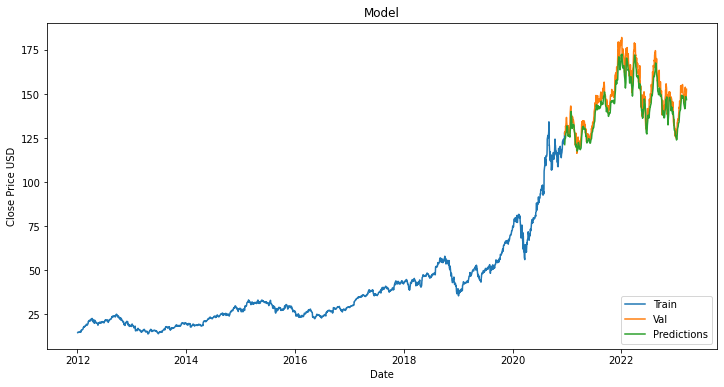

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2020-12-16,127.809998,121.276077
2020-12-17,128.699997,122.706131
2020-12-18,126.660004,124.226830
2020-12-21,128.229996,124.884430
2020-12-22,131.880005,125.420570
...,...,...
2023-03-08,152.869995,147.031631
2023-03-09,150.589996,148.355194
2023-03-10,148.500000,148.494629
